In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'ontario_data/'
#current day
df3 = pd.read_csv(path + 'conposcovidloc(4-17).csv')
df3.columns = [x.lower() for x in df3.columns]
tor_df = df3.loc[df3['reporting_phu_city']=='Toronto']
tor_df = tor_df.groupby('accurate_episode_date')
df3 = df3.groupby('accurate_episode_date')



X3 = df3.count().iloc[:,1]    # for ontario
region = 'Ontario'


# X3 = tor_df.count().iloc[:,1]   # for toronto
# region = 'Toronto'

# X3.drop(X3.tail(2).index,inplace=True)

In [3]:
from math import exp, sqrt
from scipy import optimize


#guassian function
def fx(x, a,b,c):
    return a*np.exp(-(x-b)**2/(2*(c**2)))


rsquare: 0.8930956058909989


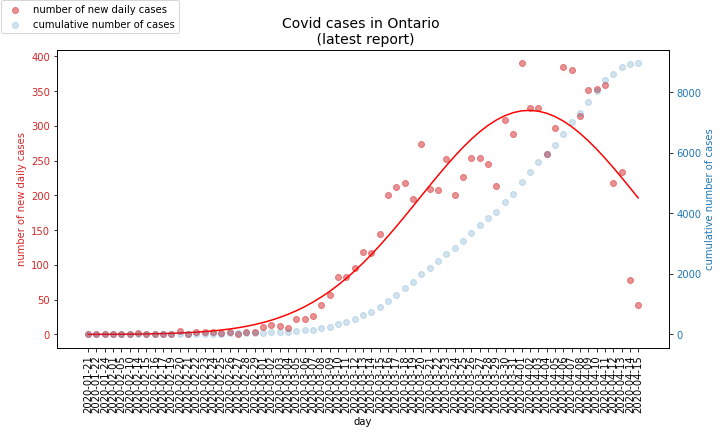

In [4]:
# Figure 2
Xc = pd.DataFrame(X3)


Xc['total'] = Xc.cumsum()
Xc = Xc.reset_index(drop=False)

Xc = Xc.rename(columns={'accurate_episode_date':'date', 'age_group': 'daily'})



data1 = [Xc['date'], Xc['daily']]
data2 = [Xc['date'], Xc['total']]

fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0.5, label='number of new daily cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cumulative number of cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(*data2, color=color, alpha=0.2, label = 'cumulative number of cases')
ax2.tick_params(axis='y', labelcolor=color)

Xx = np.array(Xc.index)
yy = np.array(Xc['daily'])

# regression
bounds = ([50,15,0],[20000,90,20])
params, params_cov = optimize.curve_fit(fx,Xx,yy, bounds=bounds)
# print(params)

# residuals
residuals = yy - fx(Xx,*params)
ssres = np.sum(residuals**2)
sstot = np.sum((yy-np.mean(yy))**2)
rsquared = 1-(ssres/sstot)
print('rsquare: {}'.format(rsquared))

ax1.plot(fx(Xx,*params), c='r')
ax1.set_title('Covid cases in {} \n (latest report)'.format(region), fontsize=14)

fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.tight_layout()
plt.savefig('./db_figures/figure1.png', dpi=300)


plt.show()


C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


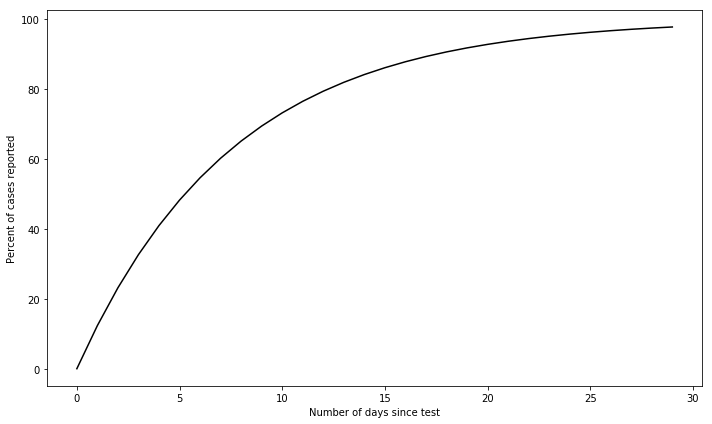

In [5]:
# figure 3
# modeling exponential hazard

x = np.linspace(0,30,30) # days

def complete(r,t): #exponential hazard
    return 1 - np.exp(-r*t)

r = 1/7.85  # 1/average time of onset to reportin

y = complete(r,x)

def lag_cases(y):
    return 1/y

yy = lag_cases(y)


plt.figure(figsize=(10,6))
plt.plot(y*100, c='k')
# plt.plot(yy)
plt.yticks()

plt.xlabel('Number of days since test')
plt.ylabel('Percent of cases reported')
plt.tight_layout()
plt.savefig('./db_figures/figure2.png', dpi=300)

plt.show()



In [6]:
yy

array([       inf, 8.09931193, 4.31610482, 3.06230425, 2.44080832,
       2.07218226, 1.82993634, 1.6598514 , 1.53481032, 1.43974189,
       1.36559845, 1.30661842, 1.25895763, 1.21995235, 1.18769813,
       1.16079714, 1.13820024, 1.11910473, 1.10288619, 1.08905188,
       1.07720799, 1.06703629, 1.05827716, 1.05071691, 1.04417839,
       1.03851373, 1.03359878, 1.02932876, 1.02561486, 1.02238148])

In [7]:
from datetime import datetime, date
now = datetime.now()
d0 = datetime(2020, 1, 21)

# timespan = now - d0


latest_date = datetime.strptime(Xc['date'].iloc[-1],'%Y-%m-%d')


delta = now-latest_date


In [8]:
Xc = pd.DataFrame(X3)
Xc['total'] = Xc.cumsum()
Xc = Xc.reset_index(drop=False)

Xc = Xc.rename(columns={'accurate_episode_date':'date', 'age_group': 'daily'})

corrected = Xc.iloc[11:] # getting only after feb 19 to avoid missing days

days_to_add = len(corrected) - len(yy[:-delta.days])
for ones in range(days_to_add):
    yy = np.append(yy,1)
    
corrected['lag_factor'] = yy[::-1][:-delta.days].tolist() #reverses array

corrected['corrected_daily'] = corrected['daily'] * corrected['lag_factor']
corrected['corrected_total'] = corrected['corrected_daily'].cumsum()

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

rsquare: 0.8609380318749481


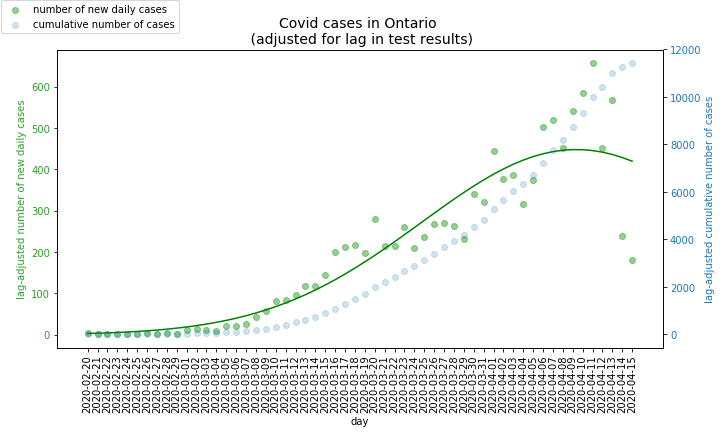

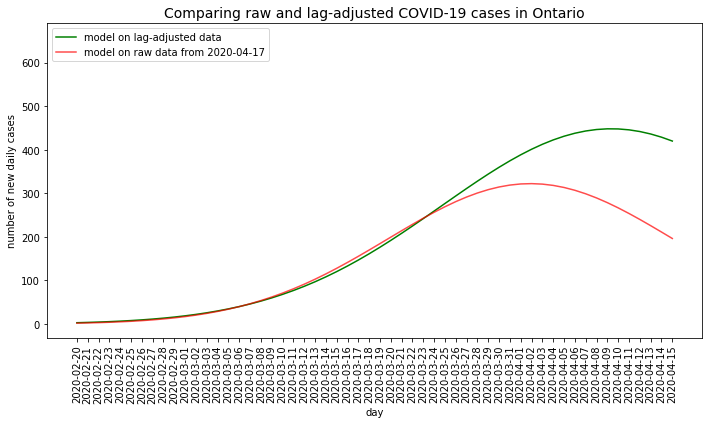

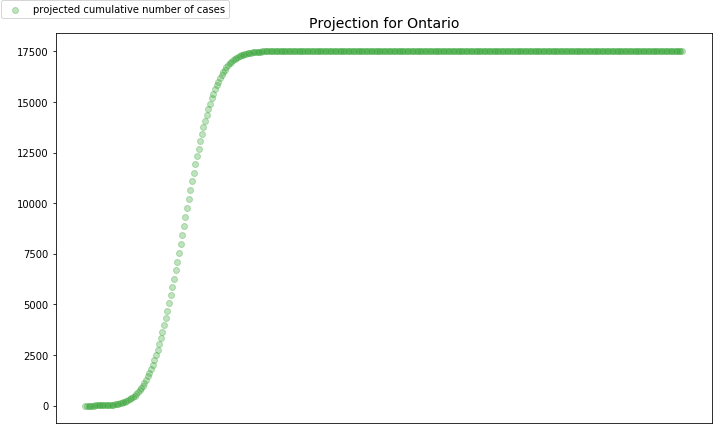

estimated total after 365 days: 17,517


In [9]:
# Figure 5
data1 = [corrected['date'], corrected['corrected_daily']]
data2 = [corrected['date'], corrected['corrected_total']]

fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))

color = 'tab:green'
ax1.set_xlabel('day')
ax1.set_ylabel('lag-adjusted number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0.5, label='number of new daily cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lag-adjusted cumulative number of cases', color=color)  # we already handled the x-label with ax1
ax2.scatter(*data2, color=color, alpha=0.2, label = 'cumulative number of cases')
ax2.tick_params(axis='y', labelcolor=color)

Xx = np.array(corrected.index)
yy = np.array(corrected['corrected_daily'])

# regression
bounds = ([50,15,0],[20000,90,20])
c_params, params_cov = optimize.curve_fit(fx,Xx,yy, bounds=bounds)
# print(params)

# residuals
residuals = yy - fx(Xx,*c_params)
ssres = np.sum(residuals**2)
sstot = np.sum((yy-np.mean(yy))**2)
rsquared = 1-(ssres/sstot)
print('rsquare: {}'.format(rsquared))

ax1.plot(fx(Xx,*c_params), c='g')
ax1.set_title('Covid cases in {} \n (adjusted for lag in test results)'.format(region), fontsize=14)

fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.tight_layout()

plt.savefig('./db_figures/figure3.png', dpi=300)

plt.show()


# Figure 6

color = 'k'
fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))
ax1.set_title('Comparing raw and lag-adjusted COVID-19 cases in {}'.format(region),fontsize=14)

ax1.set_xlabel('day')
ax1.set_ylabel('number of new daily cases', color=color)
ax1.scatter(*data1, color=color, alpha = 0, label='')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)


ax1.plot(fx(Xx,*c_params), c='g', label = 'model on lag-adjusted data')

ax1.plot(fx(Xx,*params), c='r',alpha=0.7, label = 'model on raw data from {}'.format(now.strftime('%Y-%m-%d')))
# ax1.plot(fx(Xx,*params0), c='r',alpha=0.3, label = 'model on raw data from April 2nd')
fig.tight_layout()
plt.legend()
plt.savefig('./db_figures/figure4.png', dpi=300)

plt.show()


days = 365
t = np.linspace(0,days,days)

y1 = fx(t,*c_params)
red = [Xx, yy]
blue = [t, np.cumsum(y1)]



fig, ax1 = plt.subplots(facecolor='w', figsize=(10,6))
ax1.set_title('Projection for {}'.format(region), fontsize=14)


color = 'tab:green'
ax1.scatter(*blue, color=color, alpha=0.3, label = 'projected cumulative number of cases')


fig.legend(borderaxespad=0.1, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tight_layout()

plt.savefig('./db_figures/figure5.png', dpi=300)


plt.show()

print('estimated total after {0} days: {1:,}'.format(days,int(np.cumsum(y1)[-1])))

In [10]:
g_rates = []
for i in range(-6,0):
    g_rate = (corrected.iloc[i]['corrected_total']/corrected.iloc[i-1]['corrected_total'])-1
    g_rates.append(g_rate)
    
growth_rate_from_data = sum(g_rates)/(len(range(-6,0)) -1)


growth_rate_from_data

0.05501220808253056

In [11]:
# # get beta

# n = 14570000    #total pop
# # it = 3822       # currently infectious
# # rt = 3648       # currently recovered
# # st = n - rt     # currently suscptible

# generation_inteval = 3.95

# reproductive = 1 + (growth_rate_from_data/generation_inteval)
# # reproductive = 1.20

# gamma = 1/14     # time to recovery or death (average of 14 days)
# beta = reproductive*gamma

# print('beta = {}'.format(beta))
# print('rno = {}'.format(reproductive))

# #rates (in 1/days)
# # rnot = 1.5      # estimated to be between 1.4 - 3.8
# # beta = rnot*gamma     # infection rate
# # beta_from_data = (dsdt * n)/(st * it)


# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt
# %matplotlib inline

# # total population
# N = 14570000

# # initial number of infected and recovered
# I0 = 3822
# R0 = 3648

# # everyone else
# S0 = N- I0 - R0



# # create grid of time points 
# days = 365*2
# t = np.linspace(0,days,days)

# # differential equations with SIR model
# def deriv(y, t, N, beta, gamma):
#     S, I, R, = y
#     dSdt = -beta*S*I / N
#     dIdt = (beta*S*I/N) - gamma*I
#     dRdt = gamma*I
#     return dSdt, dIdt, dRdt

# # create initial conditions vector
# y0 = S0, I0, R0

# # integration SIR equation over time space
# ret = odeint(deriv, y0, t, args=(N,beta,gamma))
# S, I, R = ret.T

# # hospitalization rate
# h_rate = 0.08
# # health system capacity
# cap = 400

# # Plot the data on three separate curves for S(t), I(t) and R(t)

# fig = plt.figure(facecolor='w',figsize=(10, 6))
# ax = fig.add_subplot(111, axisbelow=True)
# # ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='S(t)')
# ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Currently Infectious')
# # ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R, 'green', alpha=1, lw=2, label='Recovered or Died')
# # ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

# ax.set_xlabel('Time (days)')
# ax.set_ylabel("Number of cases")
# # ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)


    
# plt.tight_layout()

# plt.savefig('./db_figures/figure6.png', dpi=300)
# plt.show()

# import numpy as np
# from scipy.integrate import odeint

# import matplotlib.pyplot as plt
# %matplotlib inline

# # total population
# N = 14570000


# # everyone else
# S0 = N- I0 - R0



# # create grid of time points 
# days = 365*2
# t = np.linspace(0,days,days)

# # differential equations with SIR model
# def deriv(y, t, N, beta, gamma):
#     S, I, R, = y
#     dSdt = -beta*S*I / N
#     dIdt = (beta*S*I/N) - gamma*I
#     dRdt = gamma*I
#     return dSdt, dIdt, dRdt

# # create initial conditions vector
# y0 = S0, I0, R0

# # integration SIR equation over time space
# ret = odeint(deriv, y0, t, args=(N,beta,gamma))
# S, I, R = ret.T

# # hospitalization rate
# h_rate = 0.08
# # health system capacity
# cap = 900

# # Plot the data on three separate curves for S(t), I(t) and R(t)

# fig = plt.figure(facecolor='w',figsize=(10, 6))
# ax = fig.add_subplot(111, axisbelow=True)
# # ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='S(t)')
# # ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I(t)')
# ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# # ax.plot(t, R/1000, 'green', alpha=1, lw=2, label='R(t)')
# ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

# ax.set_xlabel('Time (days)')
# ax.set_ylabel("Number of cases")
# # ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)


    
# plt.tight_layout()

# plt.savefig('./db_figures/figure7.png', dpi=300)
# plt.show()

### start here

beta = 0.07857142857142857
rno = 1.1


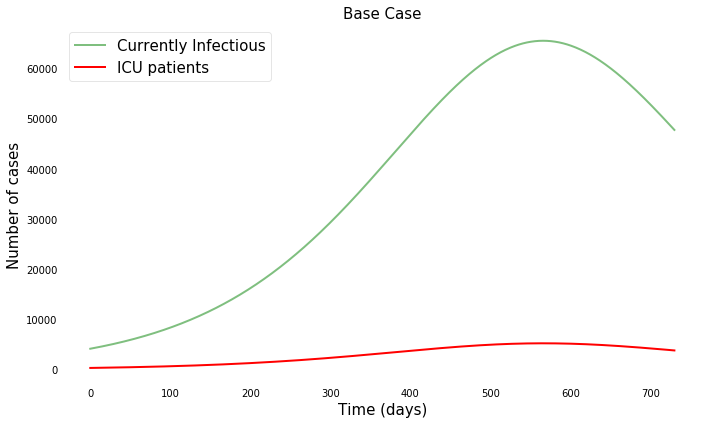

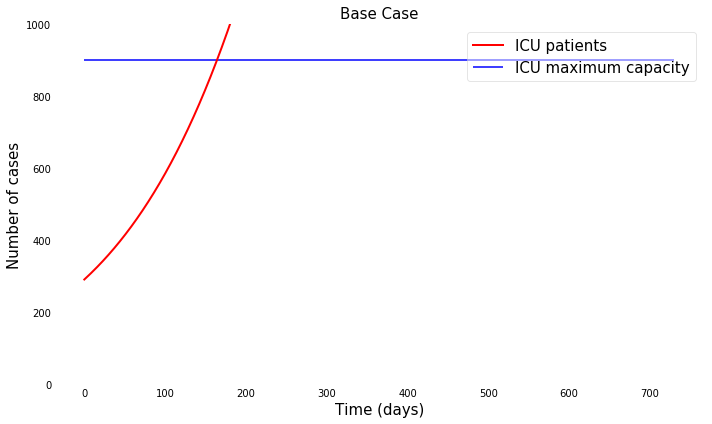

In [12]:
#base case

# hospitalization rate
h_rate = 0.08
# health system capacity
cap = 900

# icu length of stay
icu_los = 1/8


# get beta
n = 14570000    #total pop
generation_inteval = 3.95

# reproductive = 1 + (growth_rate_from_data/generation_inteval)
reproductive = 1.1

gamma = 1/14     # time to recovery or death (average of 14 days)
beta = reproductive*gamma

print('beta = {}'.format(beta))
print('rno = {}'.format(reproductive))




import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000

# initial number of infected and recovered
I0 = 4160
R0 = 4287

# everyone else
S0 = N- I0 - R0



# create grid of time points 
days = 365*2
t = np.linspace(0,days,days)

# differential equations with SIR model
def deriv(y, t, N, beta, gamma):
    S, I, R, = y
    dSdt = -beta*S*I / N
    dIdt = (beta*S*I/N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# create initial conditions vector
y0 = S0, I0, R0

# integration SIR equation over time space
ret = odeint(deriv, y0, t, args=(N,beta,gamma))
S, I, R = ret.T






# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Base Case', fontsize=15)    
# ax.plot(t, S, 'k', alpha=0.5, lw=2, label='S(t)')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Currently Infectious')
ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R, 'green', alpha=1, lw=2, label='Recovered or Died')
# ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure6.png', dpi=300)
plt.show()

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000


# everyone else
S0 = N- I0 - R0




scenario1 = (I*h_rate) - (I*h_rate*icu_los)

# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Base Case', fontsize=15)    
# ax.plot(t, S_icu, 'k', alpha=0.5, lw=2, label='S(t)')
# ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I(t)')
ax.plot(t, scenario1 , 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R_icu, 'green', alpha=1, lw=2, label='R(t)')
ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure7.png', dpi=300)
plt.show()

beta = 0.07857142857142857
rno = 1.1


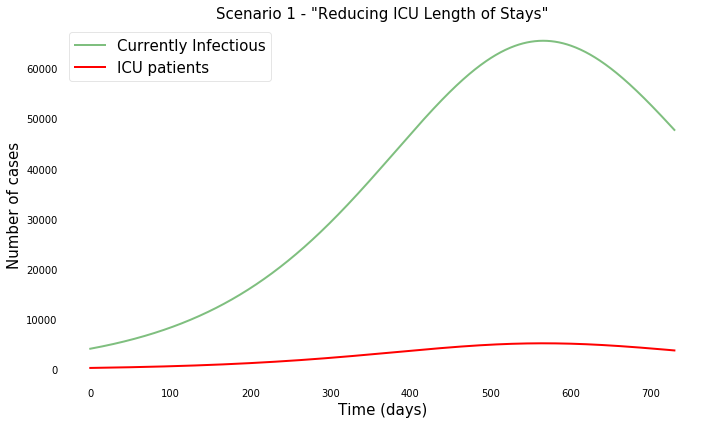

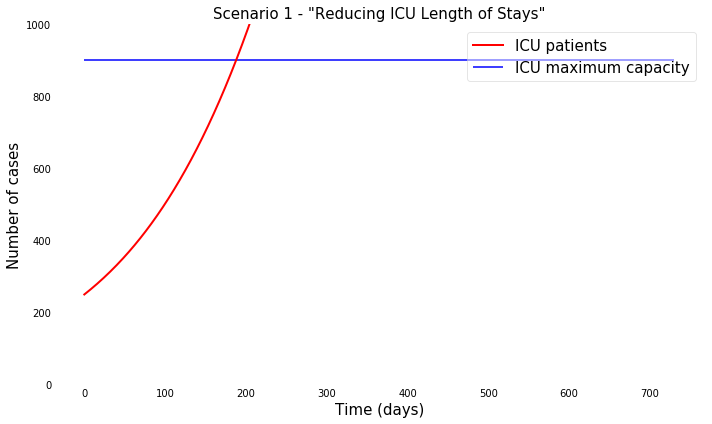

In [13]:
#reducing icu_los

# hospitalization rate
h_rate = 0.08
# health system capacity
cap = 900

# icu length of stay
icu_los = 1/4


# get beta
n = 14570000    #total pop
generation_inteval = 3.95

# reproductive = 1 + (growth_rate_from_data/generation_inteval)
reproductive = 1.1

gamma = 1/14     # time to recovery or death (average of 14 days)
beta = reproductive*gamma

print('beta = {}'.format(beta))
print('rno = {}'.format(reproductive))




import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000

# initial number of infected and recovered
I0 = 4160
R0 = 4287

# everyone else
S0 = N- I0 - R0



# create grid of time points 
days = 365*2
t = np.linspace(0,days,days)

# differential equations with SIR model
def deriv(y, t, N, beta, gamma):
    S, I, R, = y
    dSdt = -beta*S*I / N
    dIdt = (beta*S*I/N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# create initial conditions vector
y0 = S0, I0, R0

# integration SIR equation over time space
ret = odeint(deriv, y0, t, args=(N,beta,gamma))
S, I, R = ret.T






# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))

ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 1 - "Reducing ICU Length of Stays"', fontsize=15)    

# ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='S(t)')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Currently Infectious')
ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R, 'green', alpha=1, lw=2, label='Recovered or Died')
# ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure8.png', dpi=300)
plt.show()

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000


# everyone else
S0 = N- I0 - R0



scenario2 = (I*h_rate) - (I*h_rate*icu_los)


# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 1 - "Reducing ICU Length of Stays"', fontsize=15)    

# ax.plot(t, S_icu, 'k', alpha=0.5, lw=2, label='S(t)')
# ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I(t)')
ax.plot(t, scenario2, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R_icu, 'green', alpha=1, lw=2, label='R(t)')
ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure9.png', dpi=300)
plt.show()

beta = 0.07857142857142857
rno = 1.1


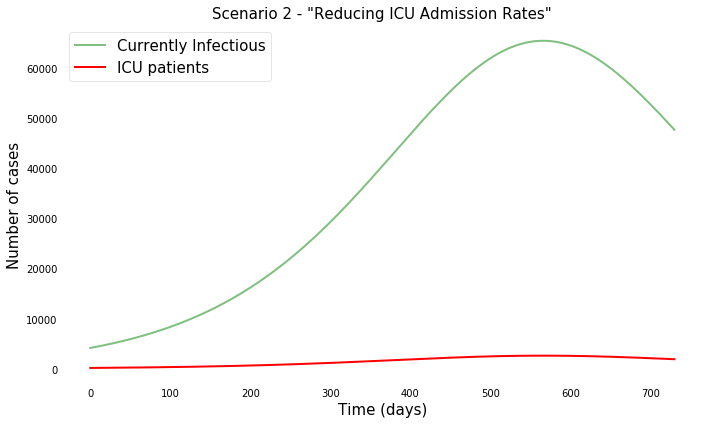

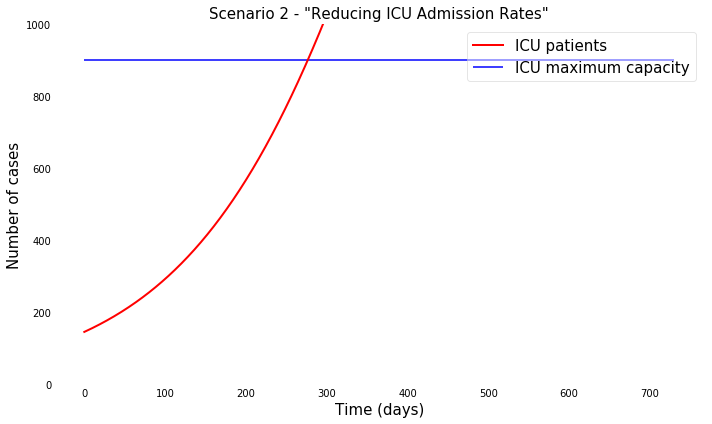

In [14]:
#reducing h_rate

# hospitalization rate
h_rate = 0.04
# health system capacity
cap = 900

# icu length of stay
icu_los = 1/8


# get beta
n = 14570000    #total pop
generation_inteval = 3.95

# reproductive = 1 + (growth_rate_from_data/generation_inteval)
reproductive = 1.1

gamma = 1/14     # time to recovery or death (average of 14 days)
beta = reproductive*gamma

print('beta = {}'.format(beta))
print('rno = {}'.format(reproductive))




import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000

# initial number of infected and recovered
I0 = 4160
R0 = 4287

# everyone else
S0 = N- I0 - R0



# create grid of time points 
days = 365*2
t = np.linspace(0,days,days)

# differential equations with SIR model
def deriv(y, t, N, beta, gamma):
    S, I, R, = y
    dSdt = -beta*S*I / N
    dIdt = (beta*S*I/N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# create initial conditions vector
y0 = S0, I0, R0

# integration SIR equation over time space
ret = odeint(deriv, y0, t, args=(N,beta,gamma))
S, I, R = ret.T






# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 2 - "Reducing ICU Admission Rates"', fontsize=15)    

# ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='S(t)')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Currently Infectious')
ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R, 'green', alpha=1, lw=2, label='Recovered or Died')
# ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure10.png', dpi=300)
plt.show()

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000


# everyone else
S0 = N- I0 - R0


scenario3 = (I*h_rate) - (I*h_rate*icu_los)



# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 2 - "Reducing ICU Admission Rates"', fontsize=15)    

# ax.plot(t, S_icu, 'k', alpha=0.5, lw=2, label='S(t)')
# ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I(t)')
ax.plot(t, scenario3, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R_icu, 'green', alpha=1, lw=2, label='R(t)')
ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure11.png', dpi=300)
plt.show()

beta = 0.07357142857142857
rno = 1.03


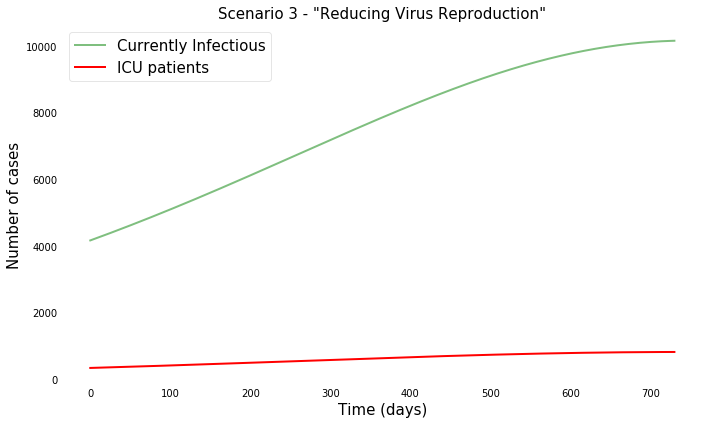

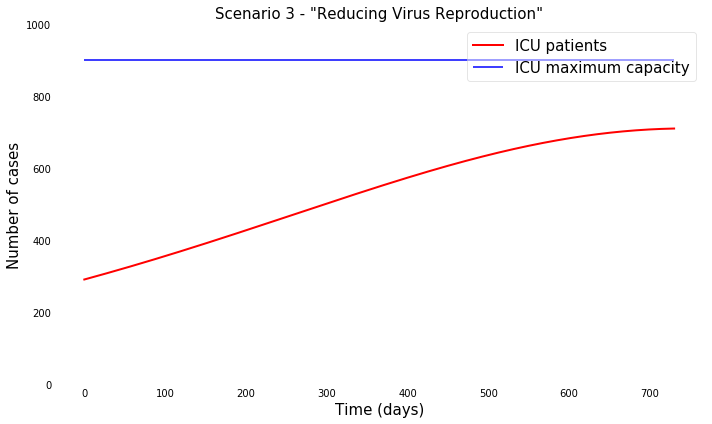

In [15]:
#reducing repro

# hospitalization rate
h_rate = 0.08
# health system capacity
cap = 900

# icu length of stay
icu_los = 1/8


# get beta
n = 14570000    #total pop
generation_inteval = 3.95

# reproductive = 1 + (growth_rate_from_data/generation_inteval)
reproductive = 1.03

gamma = 1/14     # time to recovery or death (average of 14 days)
beta = reproductive*gamma

print('beta = {}'.format(beta))
print('rno = {}'.format(reproductive))




import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000

# initial number of infected and recovered
I0 = 4160
R0 = 4287

# everyone else
S0 = N- I0 - R0



# create grid of time points 
days = 365*2
t = np.linspace(0,days,days)

# differential equations with SIR model
def deriv(y, t, N, beta, gamma):
    S, I, R, = y
    dSdt = -beta*S*I / N
    dIdt = (beta*S*I/N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# create initial conditions vector
y0 = S0, I0, R0

# integration SIR equation over time space
ret = odeint(deriv, y0, t, args=(N,beta,gamma))
S, I, R = ret.T






# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 3 - "Reducing Virus Reproduction"', fontsize=15)    

# ax.plot(t, S/1000, 'k', alpha=0.5, lw=2, label='S(t)')
ax.plot(t, I, 'g', alpha=0.5, lw=2, label='Currently Infectious')
ax.plot(t, (I)*h_rate, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R, 'green', alpha=1, lw=2, label='Recovered or Died')
# ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
# ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure12.png', dpi=300)
plt.show()

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# total population
N = 14570000


# everyone else
S0 = N- I0 - R0


scenario4 = (I*h_rate) - (I*h_rate*icu_los)



# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w',figsize=(10, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('Scenario 3 - "Reducing Virus Reproduction"', fontsize=15)    
# ax.plot(t, S_icu, 'k', alpha=0.5, lw=2, label='S(t)')
# ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I(t)')
ax.plot(t, scenario4, 'r', alpha=1, lw=2, label='ICU patients')
# ax.plot(t, R_icu, 'green', alpha=1, lw=2, label='R(t)')
ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15)
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure13.png', dpi=300)
plt.show()

In [16]:
# if we dont meet these parameters - here are the implications
# 1 - health system is overun
# 2 - choose who lives or dies
# 3 - unplugs

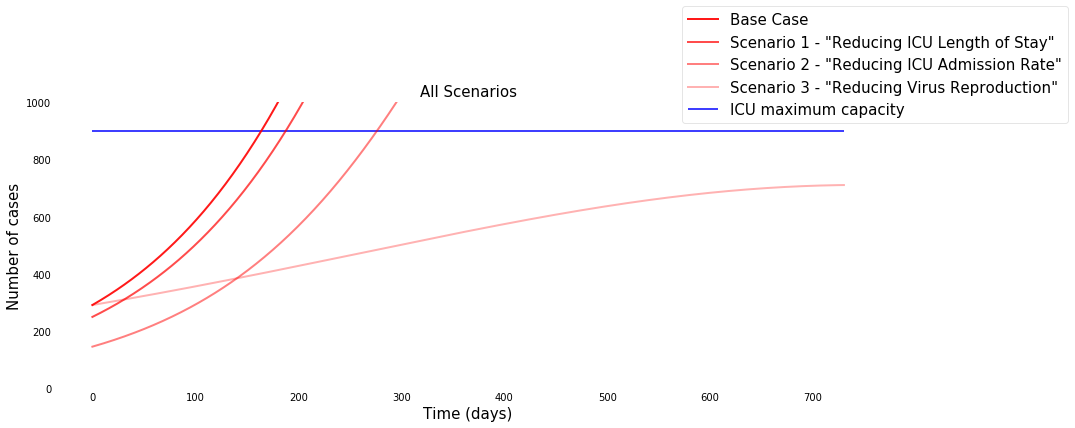

In [17]:
# ALL SCENARIOS


fig = plt.figure(facecolor='w',figsize=(15, 6))
ax = fig.add_subplot(111, axisbelow=True)
ax.set_title('All Scenarios', fontsize=15)    

ax.hlines(y=cap,xmin=0, xmax=t[-1], color='b', label = 'ICU maximum capacity')
ax.plot(t, scenario1, 'r', alpha=0.9, lw=2, label='Base Case')
ax.plot(t, scenario2, 'r', alpha=0.7, lw=2, label='Scenario 1 - "Reducing ICU Length of Stay"')
ax.plot(t, scenario3, 'r', alpha=0.5, lw=2, label='Scenario 2 - "Reducing ICU Admission Rate"')
ax.plot(t, scenario4, 'r', alpha=0.3, lw=2, label='Scenario 3 - "Reducing Virus Reproduction"')

# ax.plot(t, R_icu, 'green', alpha=1, lw=2, label='R(t)')

ax.set_xlabel('Time (days)', fontsize=15)
ax.set_ylabel("Number of cases", fontsize=15)
ax.set_ylim(0,1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend(fontsize=15, bbox_to_anchor=(0.75, 0.9))
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


    
plt.tight_layout()

plt.savefig('./db_figures/figure14.png', dpi=300)
plt.show()